In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [223]:
data = pd.read_csv("1809031-student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [224]:
data.shape

(395, 33)

In [225]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [226]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [227]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [229]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [230]:
corrmat = data.corr()
corrmat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


# Data Visualization

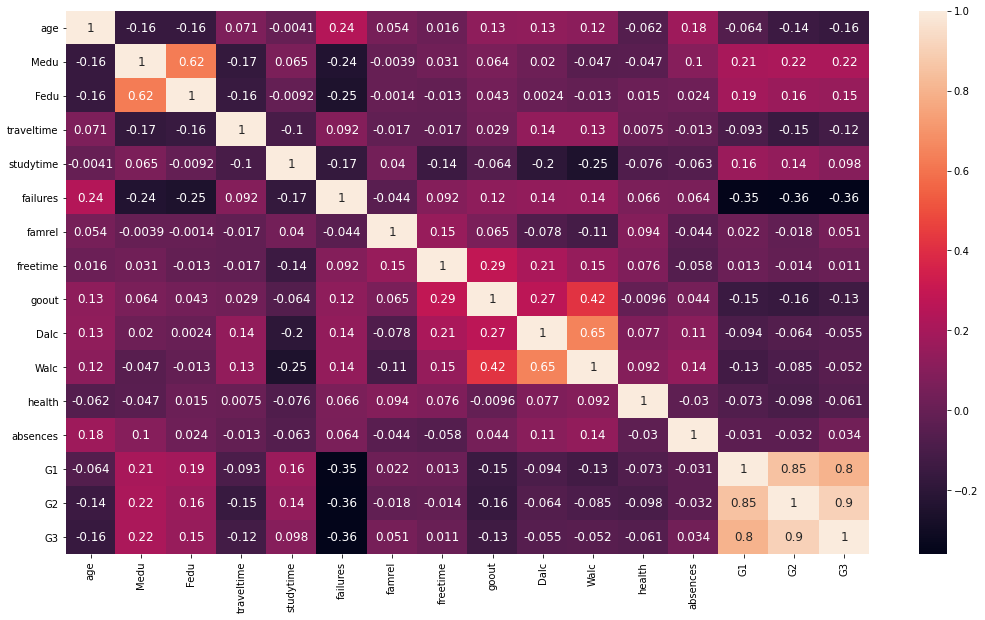

In [231]:
fig, ax=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':12})

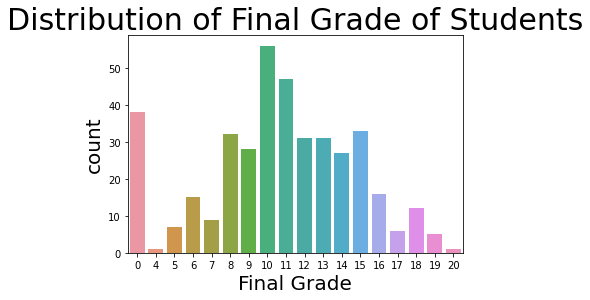

In [232]:
plot = sns.countplot(data['G3'])
plot.axes.set_title("Distribution of Final Grade of Students",fontsize=30)
plot.set_xlabel('Final Grade',fontsize=20)
plot.set_ylabel('count',fontsize=20)
plt.show()

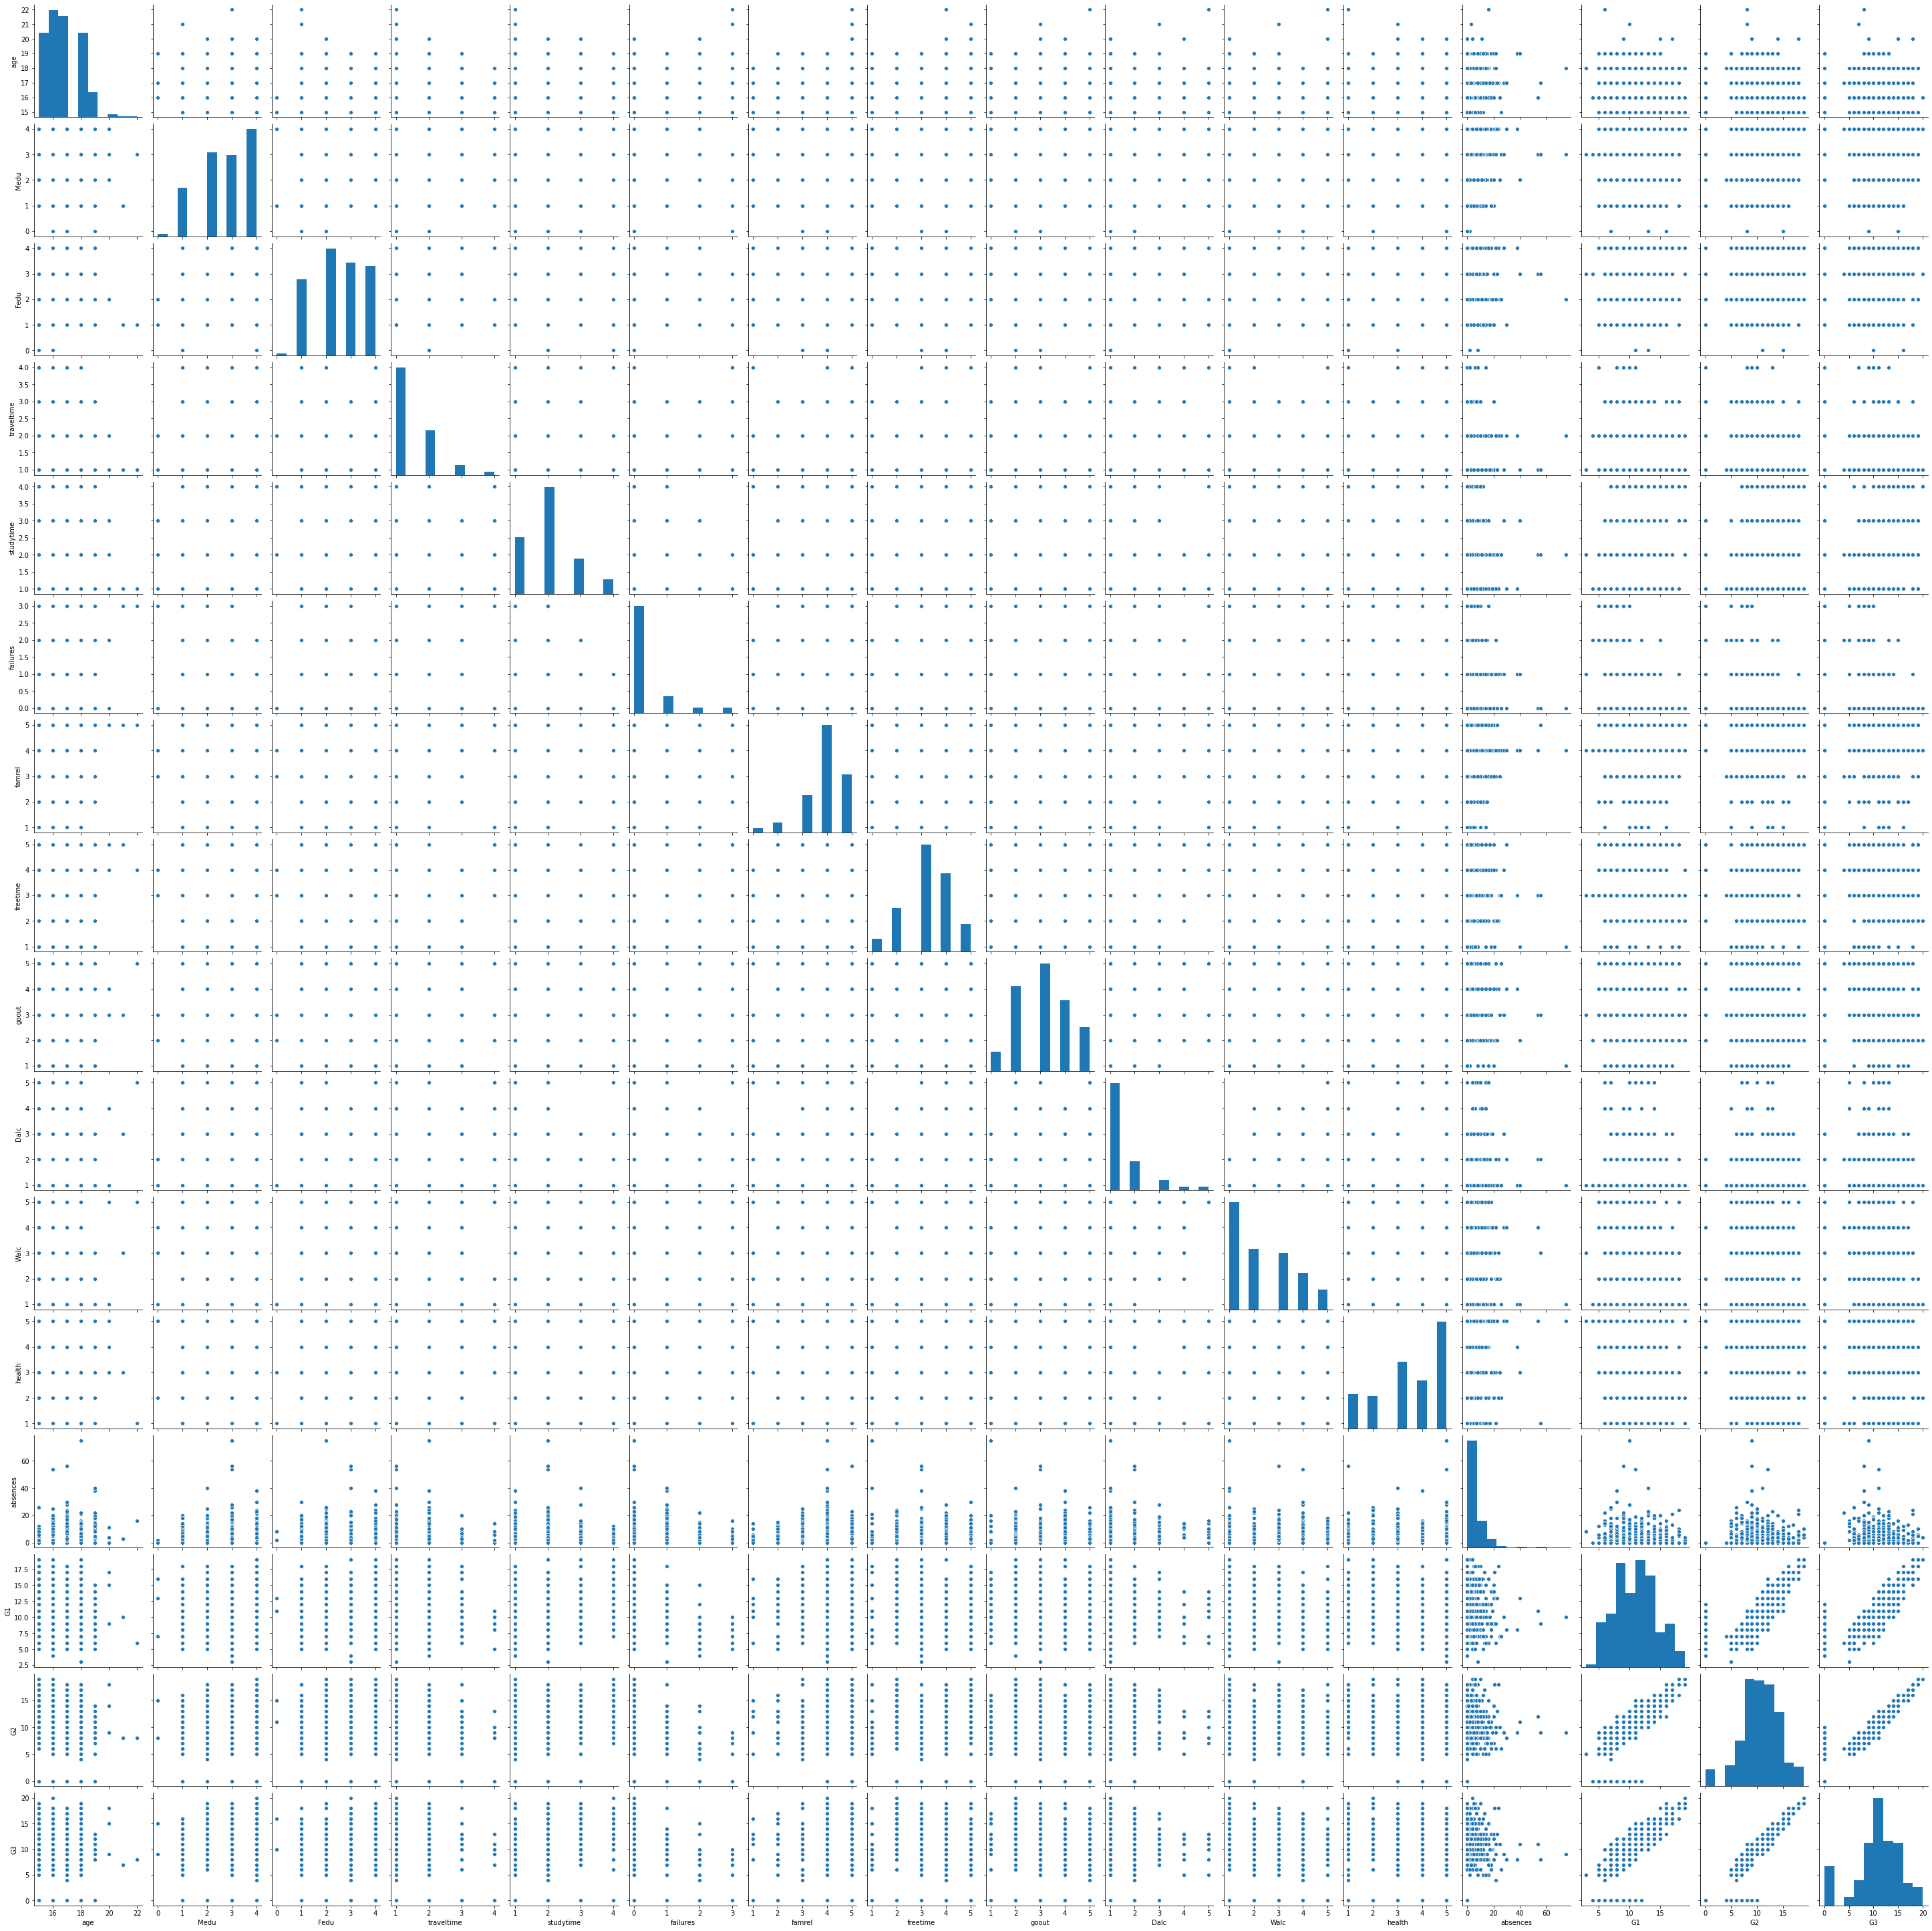

In [233]:
sns.pairplot(data)

In [234]:
#Printing how many mal and female students are here
male_studs = len(data[data['sex']=='M'])
female_studs = len(data[data['sex']=='F'])
print("No. of male students are ",male_studs)
print("No. of female students are ",female_studs)

No. of male students are  187
No. of female students are  208


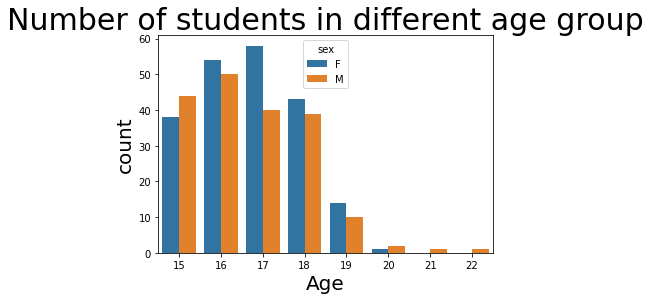

In [235]:
plot = sns.countplot('age',hue='sex', data=data)
plot.axes.set_title("Number of students in different age group",fontsize=30)
plot.set_xlabel('Age',fontsize=20)
plot.set_ylabel('count',fontsize=20)
plt.show()

In [236]:
#create one more column to find the average of all grade columns
data['Grade_average']=(data['G1']+data['G2']+data['G3'])/3
data['Grade_average']

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: Grade_average, Length: 395, dtype: float64

In [237]:
#let's create grades on the basis of percentage
def find_grade(data):
    grades=[]
    for row in data['Grade_average']:
        if row>=(0.9*data['Grade_average'].max()):
            grades.append('1')
        elif row>=(0.7*data['Grade_average'].max()):
            grades.append('2')
        elif row<(0.7*data['Grade_average'].max()):
            grades.append('3')
    data['Grade_average']=grades
    return data

In [238]:
data_dum=find_grade(data)

In [239]:
data_dum.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Grade_average'],
      dtype='object')

In [240]:
data_dum.drop(['school','age'],axis=1,inplace=True)
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Grade_average'],
      dtype='object')

In [241]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_average
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


# Converting String data into numeric data

In [242]:
d={'yes':1,'no':0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(d)
data_dum['famsup'] = data_dum['famsup'].map(d)
data_dum['paid'] = data_dum['paid'].map(d)
data_dum['activities'] = data_dum['activities'].map(d)
data_dum['nursery'] = data_dum['nursery'].map(d)
data_dum['higher'] = data_dum['higher'].map(d)
data_dum['internet'] = data_dum['internet'].map(d)
data_dum['romantic'] = data_dum['romantic'].map(d)

In [243]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_average
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


In [244]:
d={'F':1,'M':0}
data_dum['sex'] = data_dum['sex'].map(d)

In [245]:
d = {'home':0,'reputation':1,'course':2,'other':3}
data_dum['reason'] = data_dum['reason'].map(d)

In [246]:
d = {'mother':0,'father':1,'other':2}
data_dum['guardian'] = data_dum['guardian'].map(d)

In [247]:
d = {'teacher':0,'health':1,'services':2,'at_home':2,'other':4}
data_dum['Mjob'] = data_dum['Mjob'].map(d)
data_dum['Fjob'] = data_dum['Fjob'].map(d)

In [248]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_average
0,1,U,GT3,A,4,4,2,0,2,0,...,3,4,1,1,3,6,5,6,6,3
1,1,U,GT3,T,1,1,2,4,2,1,...,3,3,1,1,3,4,5,5,6,3
2,1,U,LE3,T,1,1,2,4,3,0,...,3,2,2,3,3,10,7,8,10,3
3,1,U,GT3,T,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,2
4,1,U,GT3,T,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,3


In [249]:
d = {'U':0,'R':1}
data_dum['address'] = data_dum['address'].map(d)

In [250]:
d = {'GT3':0,'LE3':1}
data_dum['famsize'] = data_dum['famsize'].map(d)

In [251]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_average
0,1,0,0,A,4,4,2,0,2,0,...,3,4,1,1,3,6,5,6,6,3
1,1,0,0,T,1,1,2,4,2,1,...,3,3,1,1,3,4,5,5,6,3
2,1,0,1,T,1,1,2,4,3,0,...,3,2,2,3,3,10,7,8,10,3
3,1,0,0,T,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,2
4,1,0,0,T,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,3


In [252]:
d = {'A':0,'T':1}
data_dum['Pstatus'] = data_dum['Pstatus'].map(d)

In [253]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_average
0,1,0,0,0,4,4,2,0,2,0,...,3,4,1,1,3,6,5,6,6,3
1,1,0,0,1,1,1,2,4,2,1,...,3,3,1,1,3,4,5,5,6,3
2,1,0,1,1,1,1,2,4,3,0,...,3,2,2,3,3,10,7,8,10,3
3,1,0,0,1,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,2
4,1,0,0,1,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,3


In [254]:
X = data_dum.drop("G3",axis=1)
y = data_dum['G3']

# Split the data into training and testing

In [255]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(296, 31) (296,) (99, 31) (99,)


In [256]:
X_train.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade_average
152,1,1,0,1,3,3,2,2,1,2,...,4,2,1,2,3,3,8,10,10,3
289,0,0,1,0,4,4,0,0,1,0,...,5,4,3,1,1,2,9,15,13,2
195,1,0,1,1,2,4,2,2,2,1,...,4,3,2,1,1,5,0,14,15,2
100,0,0,0,1,4,4,2,2,3,0,...,4,5,5,5,5,4,14,7,7,3
281,0,0,1,0,3,2,0,2,0,0,...,4,4,4,3,4,3,19,11,9,3


# Fit the Linear Regression model on training data 

In [257]:
model = LinearRegression()

In [258]:
model.fit(X_train,y_train)

LinearRegression()

# Predict the output for testing data

In [259]:
y_pred = model.predict(X_test)

# Calculate the accuracy score of testing data

In [260]:
print(model.score(X_test,y_test))

0.8091407643802981


In [261]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error is ",mae)

Mean absolute error is  1.3561358813081563


In [262]:
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error is ",mse)

Mean squared error is  4.141690201871306


In [263]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("r2_score is ",score)

r2_score is  0.8091407643802981
